In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
df = pd.read_csv('./embeddings_combined.csv')

In [3]:
# Standardize the data before Using PCA to reduce dimensions
from sklearn.preprocessing import StandardScaler

embedding_cols = [str(i) for i in range(1024)]
scaler = StandardScaler()
df[embedding_cols] = scaler.fit_transform(df[embedding_cols].values)

In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['sector_encoded'] = label_encoder.fit_transform(df['industry'])
num_classes = len(df['sector'].unique())

In [18]:
X = df[embedding_cols].values
y = df['sector_encoded'].values

In [19]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Data split into training and test sets.")

print(len(X_test), len(X_train), len(y_test), len(y_train))

Data split into training and test sets.
7615 30457 7615 30457


In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=8)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [24]:
print(y_pred)
print(y_test)

[ 16 111  37 ...   7   9  42]
[ 16  80  40 ... 101   9  42]


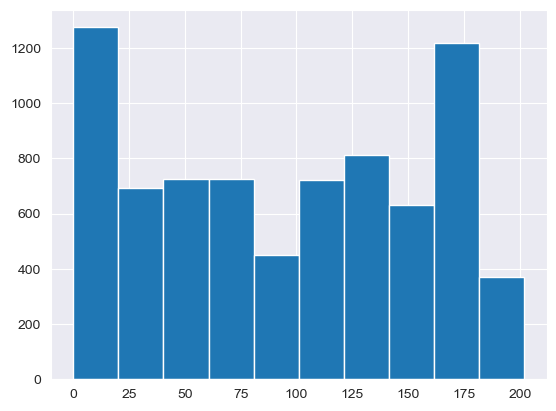

Accuracy: 0.5597
F1 Score: 0.5383


In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

plt.hist(y_test)
plt.show()
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")